# King County

In [1]:
%%capture
import sys
!ln -s ../syntheticml .
!{sys.executable} -m pip install -r ../requirements.txt
!{sys.executable} -m pip install -U kaleido
!{sys.executable} -m pip install git+https://github.com/mostly-ai/virtualdatalab.git

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/kingcounty/raw/kc_house_data.csv');
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1474,2413301070,20150324T000000,280000.0,4,2.25,2100,8075,2.0,0,0,...,8,2100,0,1978,0,98003,47.3251,-122.329,2100,7464
19845,3869900139,20150107T000000,484950.0,3,2.25,1590,926,3.0,0,0,...,8,1590,0,2014,0,98136,47.5402,-122.387,1640,1321
4401,7855900110,20140718T000000,1088890.0,4,2.75,3460,11350,1.0,0,4,...,9,1780,1680,1974,0,98006,47.5680,-122.153,3200,13874


In [3]:
%%capture
from syntheticml.data.synthetic import Synthetic, MODELS
syn = Synthetic(df, 
        id="id",
        #category_columns=("condition", "floors", "grade", "view", "waterfront", "yr_built", "yr_renovated", "zipcode", "bathrooms", "bedrooms",),
        category_columns=("condition", "floors", "grade", "view", "waterfront", "zipcode", "bathrooms", "bedrooms",),
        #exclude_columns=('date',),
        synthetic_folder = "../datasets/kingcounty/synth",
        models=MODELS.keys(),
        target_column="price",
        n_sample = 21613,
        max_cpu_pool=1
)

In [4]:
%%capture  --no-display
syn.process()

syn.process_scores()


## Metricas
### Continuas

In [5]:
metrics = syn.current_metrics()
metrics[~metrics.is_categorical].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing,mean,std_err,upper_ci,...,mode_freq,median,0.1%,1.0%,5.0%,25.0%,75.0%,95.0%,99.0%,99.9%
1,sqft_living15,"[1440, 1540, 1560, 1500, 1610]","[156, 154, 152, 137, 136]","[0.009022556390977444, 0.008906882591093117, 0...",False,17290.0,0.0,1982.904569,5.180812,1993.058774,...,0.009023,1840.0000,740.000000,950.000000,1140.0000,1480.000,2360.000,3.280000e+03,4.050000e+03,4.985550e+03
5,sqft_lot,"[5000, 4000, 6000, 7200, 4800]","[301, 209, 208, 179, 98]","[0.017408906882591092, 0.012087912087912088, 0...",False,17290.0,0.0,14798.947368,295.374719,15377.871180,...,0.017409,7600.0000,737.156000,1005.000000,1756.0000,5001.250,10606.750,4.299910e+04,2.121922e+05,4.356000e+05
6,sqft_lot15,"[5000, 4000, 6000, 7200, 4800]","[349, 289, 224, 160, 120]","[0.02018507807981492, 0.016714864083285135, 0....",False,17290.0,0.0,12725.059341,209.331173,13135.340900,...,0.020185,7615.0000,886.289000,1189.000000,1965.0000,5083.000,10046.000,3.682165e+04,1.682959e+05,3.069984e+05
7,yr_built,"[2014, 2005, 2006, 2004, 2007]","[449, 371, 366, 350, 347]","[0.025968768074031232, 0.02145748987854251, 0....",False,17290.0,0.0,1971.108329,0.223859,1971.547085,...,0.025969,1975.0000,1900.000000,1904.000000,1915.0000,1951.000,1997.000,2.011000e+03,2.014000e+03,2.015000e+03
8,long,"[-122.29, -122.362, -122.288, -122.3, -122.372]","[100, 88, 81, 81, 81]","[0.00578368999421631, 0.005089647194910353, 0....",False,17290.0,0.0,-122.214139,0.001068,-122.212045,...,0.005784,-122.2310,-122.497000,-122.408000,-122.3870,-122.329,-122.125,-1.219790e+02,-1.217870e+02,-1.216989e+02
9,lat,"[47.5402, 47.6875, 47.686, 47.6624, 47.5518]","[14, 13, 13, 13, 13]","[0.0008097165991902834, 0.0007518796992481203,...",False,17290.0,0.0,47.560330,0.001053,47.562393,...,0.000810,47.5718,47.192729,47.257334,47.3107,47.472,47.678,4.774995e+01,4.777281e+01,4.777670e+01
11,sqft_above,"[1300, 1010, 1200, 1220, 1140]","[166, 165, 160, 152, 148]","[0.009600925390399074, 0.009543088490456911, 0...",False,17290.0,0.0,1785.962175,6.248515,1798.209039,...,0.009601,1560.0000,520.000000,700.000000,850.0000,1200.000,2200.000,3.380000e+03,4.371100e+03,6.070000e+03
13,sqft_living,"[1400, 1300, 1720, 1250, 1540]","[109, 107, 106, 106, 105]","[0.006304222093695778, 0.006188548293811452, 0...",False,17290.0,0.0,2073.894910,6.900053,2087.418766,...,0.006304,1910.0000,522.890000,720.000000,940.0000,1430.000,2540.000,3.740000e+03,4.921100e+03,6.965550e+03
15,sqft_basement,"[0, 600, 700, 500, 800]","[10553, 182, 169, 167, 164]","[0.6103528050896472, 0.010526315789473684, 0.0...",False,17290.0,0.0,287.932736,3.336545,294.472244,...,0.610353,0.0000,0.000000,0.000000,0.0000,0.000,550.000,1.180000e+03,1.650000e+03,2.324220e+03
18,price,"[350000.0, 450000.0, 425000.0, 550000.0, 32500...","[143, 140, 123, 123, 123]","[0.008270676691729323, 0.008097165991902834, 0...",False,17290.0,0.0,537768.047947,2748.953957,543155.898699,...,0.008271,450000.0000,95000.000000,154467.000000,210000.0000,320150.000,640000.000,1.150000e+06,1.950000e+06,3.331995e+06


In [6]:
print(metrics[~metrics.is_categorical].dropna(axis=1, how='all').head(1).T.style.to_latex())

\begin{tabular}{ll}
 & 1 \\
name & sqft_living15 \\
top5 & [1440 1540 1560 1500 1610] \\
top5_freq & [156 154 152 137 136] \\
top5_prob & [0.00902256 0.00890688 0.00879121 0.00792366 0.00786582] \\
is_categorical & False \\
nobs & 17290.000000 \\
missing & 0.000000 \\
mean & 1982.904569 \\
std_err & 5.180812 \\
upper_ci & 1993.058774 \\
lower_ci & 1972.750365 \\
std & 681.232425 \\
iqr & 880.000000 \\
iqr_normal & 652.344976 \\
mad & 533.236679 \\
mad_normal & 668.313069 \\
coef_var & 0.343553 \\
range & 5811.000000 \\
max & 6210.000000 \\
min & 399.000000 \\
skew & 1.095314 \\
kurtosis & 4.571964 \\
jarque_bera & 5237.372383 \\
jarque_bera_pval & 0.000000 \\
mode & 1440.000000 \\
mode_freq & 0.009023 \\
median & 1840.000000 \\
0.1% & 740.000000 \\
1.0% & 950.000000 \\
5.0% & 1140.000000 \\
25.0% & 1480.000000 \\
75.0% & 2360.000000 \\
95.0% & 3280.000000 \\
99.0% & 4050.000000 \\
99.9% & 4985.550000 \\
\end{tabular}



### Categoricas

In [7]:
metrics[metrics.is_categorical].dropna(axis=1, how='all').head(1).T.to_markdown()

/home/gvillarroel/.pyenv/versions/3.9.15/envs/syn/lib/python3.9/site-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)
/home/gvillarroel/.pyenv/versions/3.9.15/envs/syn/lib/python3.9/site-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


'|                | 0                                                        |\n|:---------------|:---------------------------------------------------------|\n| name           | floors                                                   |\n| top5           | [1.  2.  1.5 3.  2.5]                                    |\n| top5_freq      | [8488 6628 1523  517  128]                               |\n| top5_prob      | [0.49091961 0.38334297 0.0880856  0.02990168 0.00740312] |\n| is_categorical | True                                                     |\n| nobs           | 17290.0                                                  |\n| missing        | 17290.0                                                  |'

In [8]:
len(metrics[~metrics.is_categorical].dropna(axis=1, how='all').columns)-1+len(metrics[metrics.is_categorical].dropna(axis=1, how='all').columns)-1

40

## Scores

In [9]:
best_model = "tddpm_mlp_21613"
second_best_model = "smote-enc_21613"
avg = syn.scores[syn.scores["type"] == "avg"]
avg.sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"],["score", "DCR ST 5th", "DCR SH 5th", "DCR TH 5th"]]
#["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"]

,score,DCR ST 5th,DCR SH 5th,DCR TH 5th
name,,,,
tddpm_mlp_21613,0.962789,0.084187,0.104472,0.03575
smote-enc_21613,0.954592,0.058759,0.090209,0.03575
gaussiancopula_noise_21613,0.827655,0.209163,0.229880,0.03575
tvae_21613,0.819230,0.108154,0.133609,0.03575
tvae_noise_21613,0.814853,0.121998,0.139551,0.03575
gaussiancopula_21613,0.812633,0.206765,0.226026,0.03575
copulagan_noise_21613,0.803317,0.230017,0.253036,0.03575
copulagan_21613,0.780299,0.219406,0.242047,0.03575
ctgan_noise_21613,0.760218,0.207462,0.230596,0.03575


In [10]:
print(syn.scores.sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"],["type", "score"]].reset_index().pivot(index="name", columns=["type"],values="score").sort_values("avg", ascending=False).rename(columns={'avg':'Score'}).style.to_latex())
# .style.to_latex()
#syn.scores[syn.scores["type"] != "avg"].sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613"],["type", "score", "DCR ST 5th", "DCR SH 5th", "DCR TH 5th"]]

\begin{tabular}{lrrr}
type & Column Pair Trends & Column Shapes & Score \\
name &  &  &  \\
tddpm_mlp_21613 & 0.954061 & 0.971517 & 0.962789 \\
smote-enc_21613 & 0.941977 & 0.967207 & 0.954592 \\
gaussiancopula_noise_21613 & 0.845585 & 0.809726 & 0.827655 \\
tvae_21613 & 0.781927 & 0.856533 & 0.819230 \\
tvae_noise_21613 & 0.770583 & 0.859122 & 0.814853 \\
gaussiancopula_21613 & 0.833007 & 0.792259 & 0.812633 \\
copulagan_noise_21613 & 0.761719 & 0.844915 & 0.803317 \\
copulagan_21613 & 0.745335 & 0.815264 & 0.780299 \\
ctgan_noise_21613 & 0.749491 & 0.770946 & 0.760218 \\
ctgan_21613 & 0.735844 & 0.746231 & 0.741038 \\
\end{tabular}



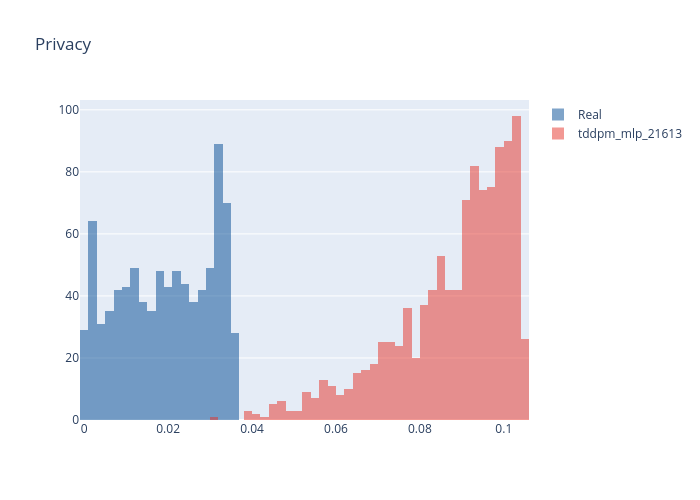

None

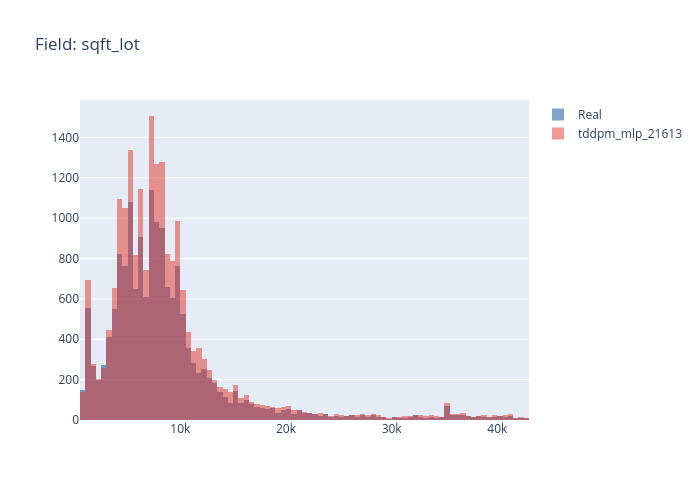

None

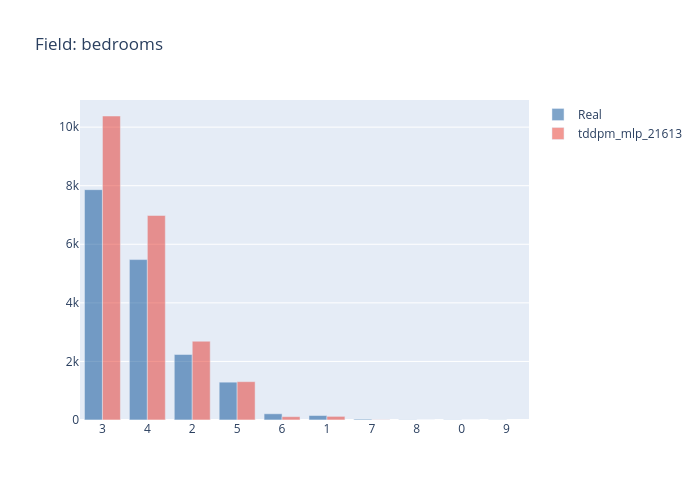

None

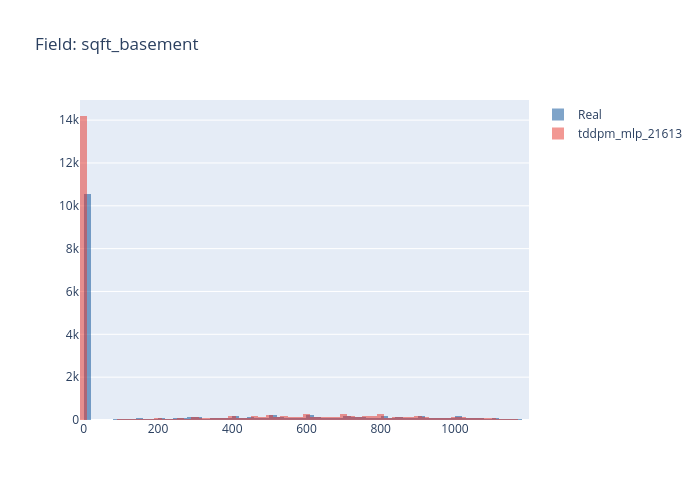

None

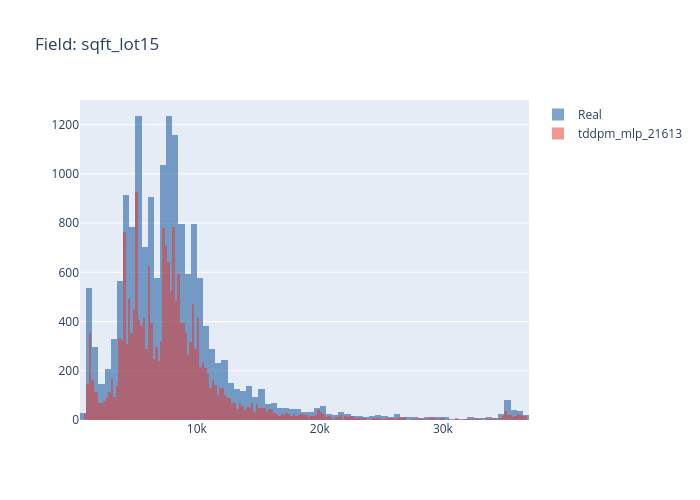

None

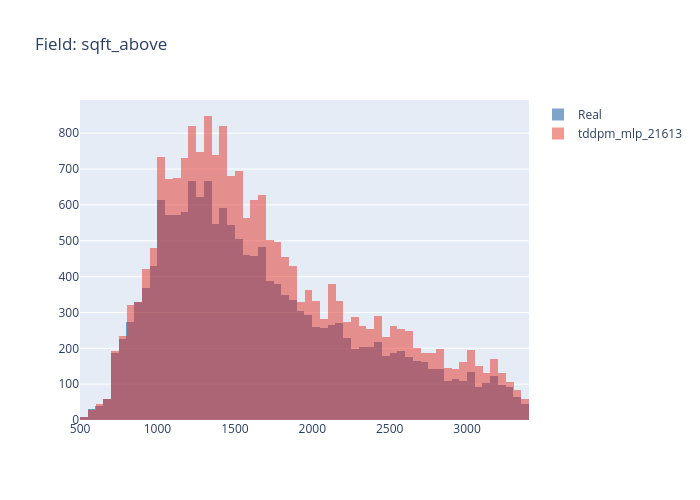

None

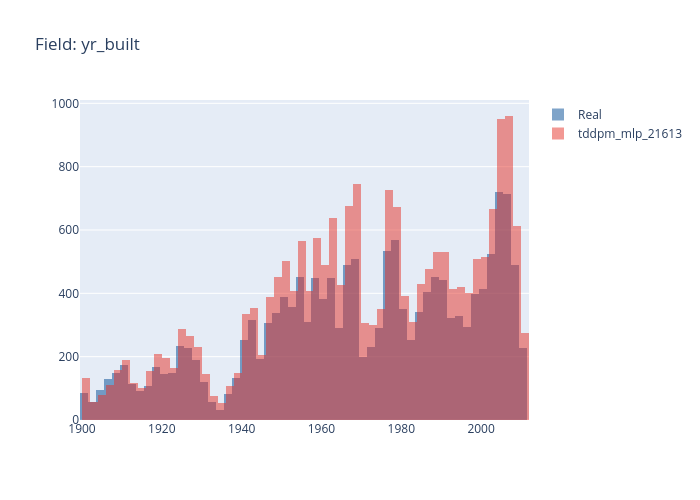

None

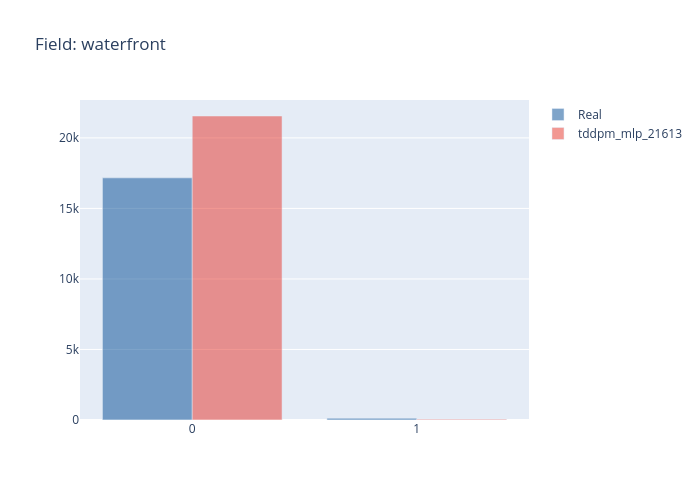

None

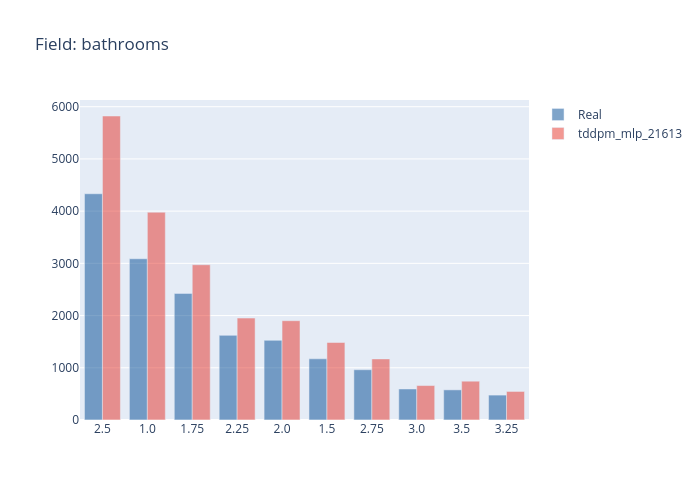

None

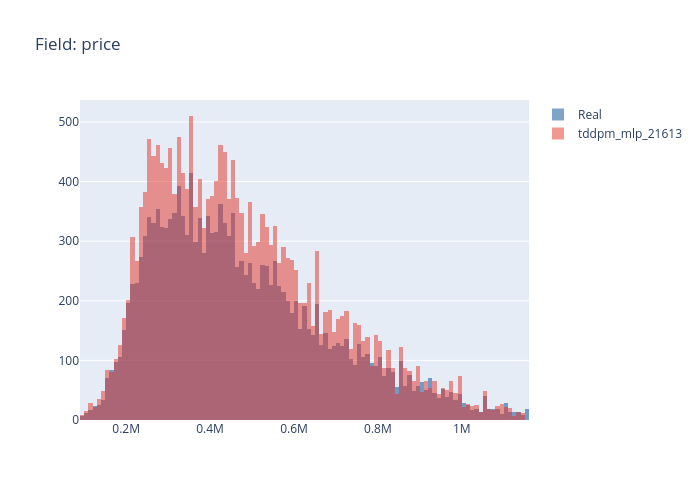

None

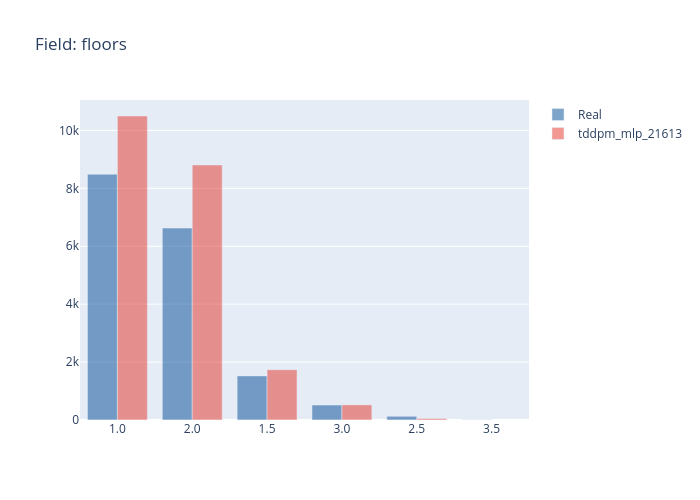

None

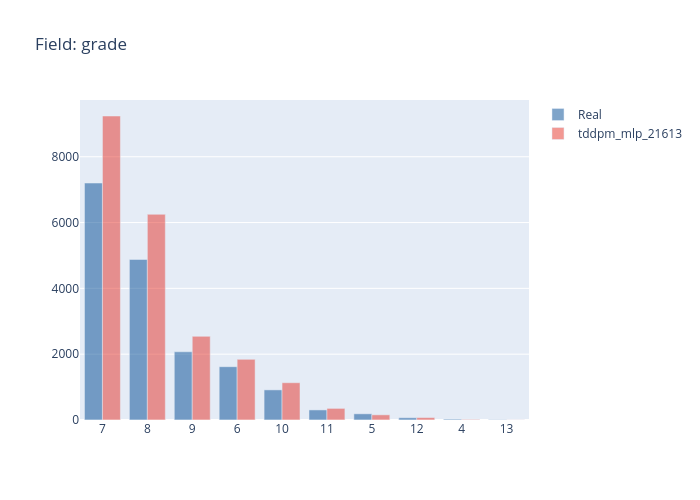

None

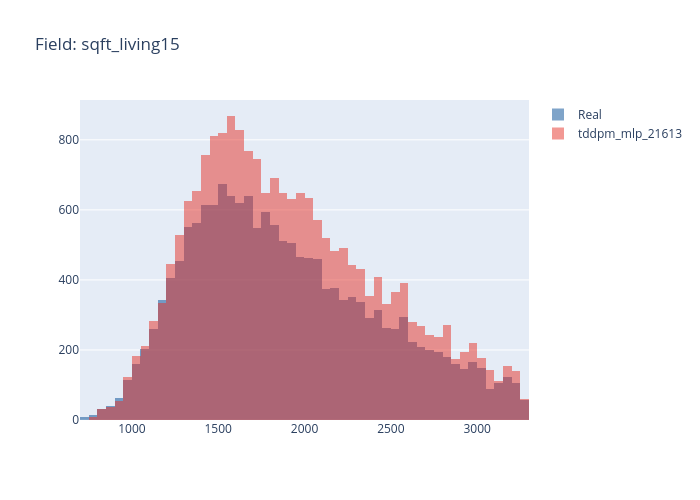

None

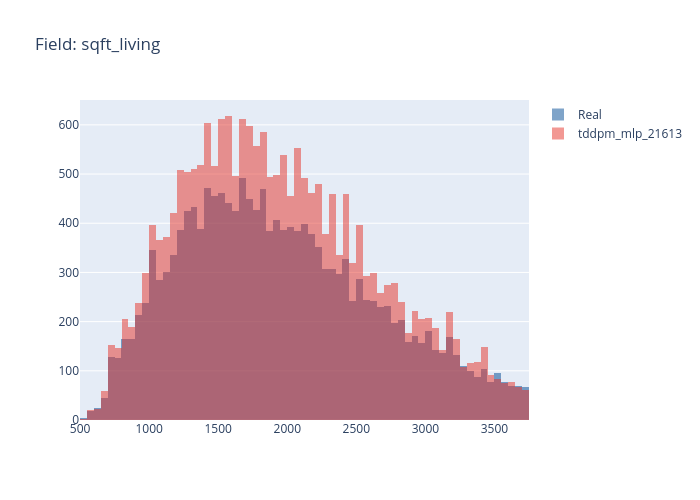

None

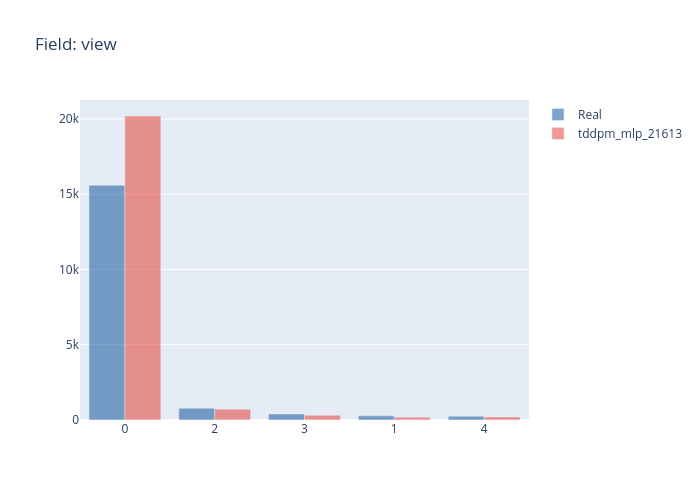

None

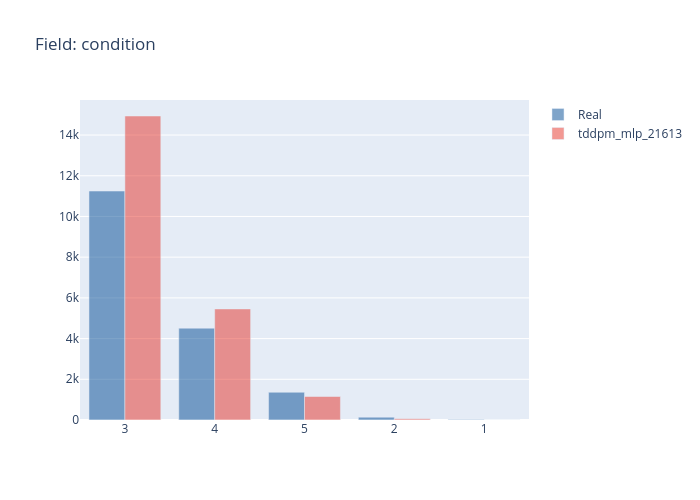

None

In [11]:
from syntheticml.data.charts import Charts
import os
folder_path = f"../docs/tesis/imagenes/{best_model}"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
for fig in syn.get_charts(best_model, {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        file_name = f'{fig.layout.title.text.replace(":","").replace(" ","_").lower()}.svg'
        fig.write_image(f"{folder_path}/{file_name}")
        display(fig.show("png"))

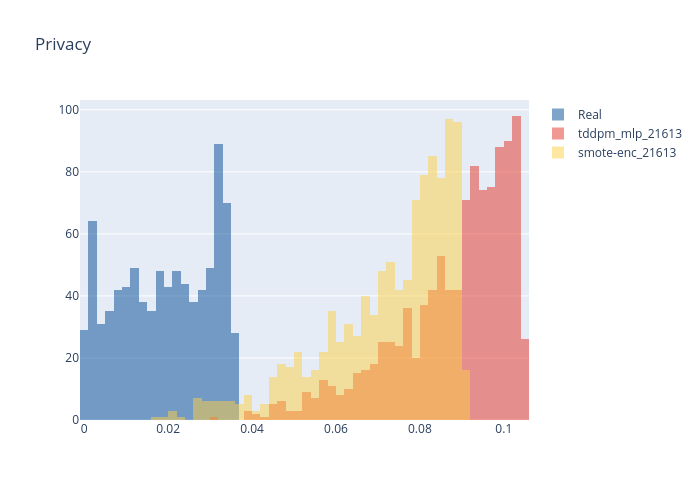

None

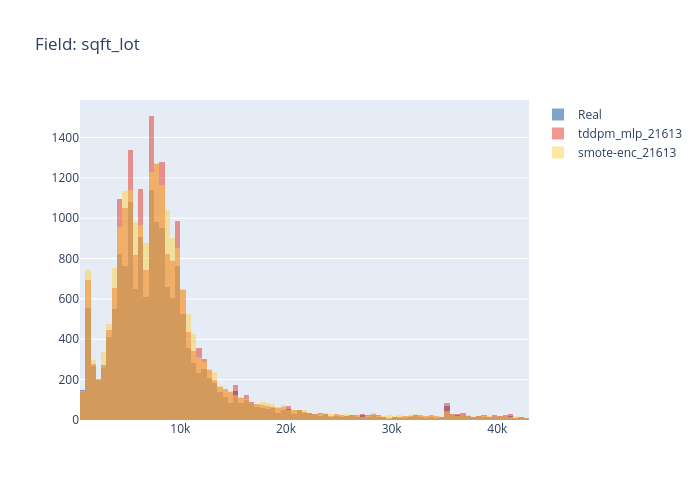

None

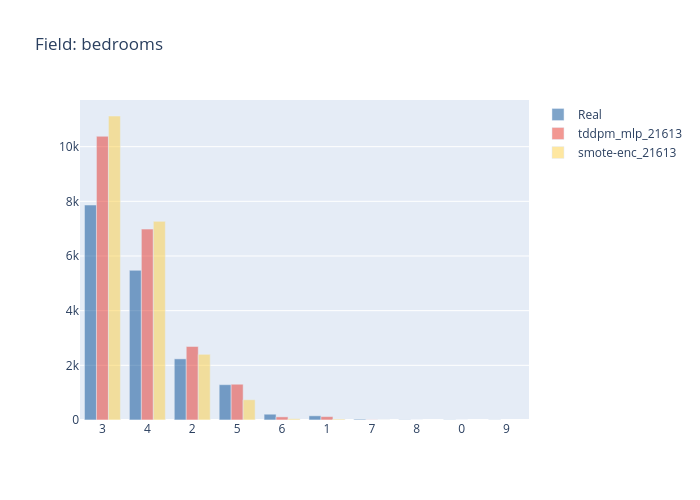

None

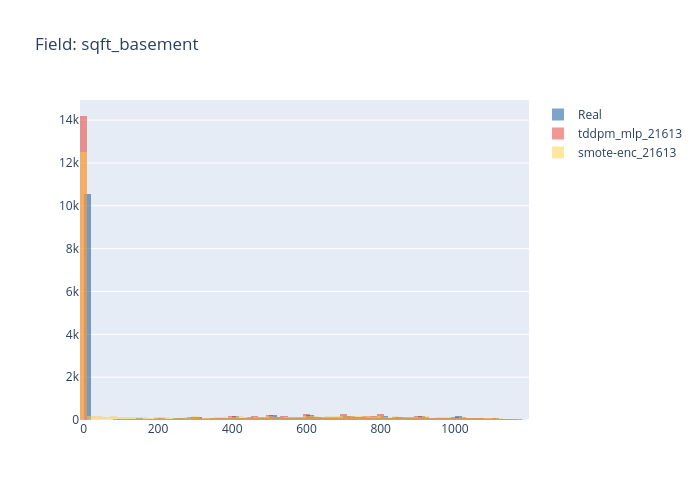

None

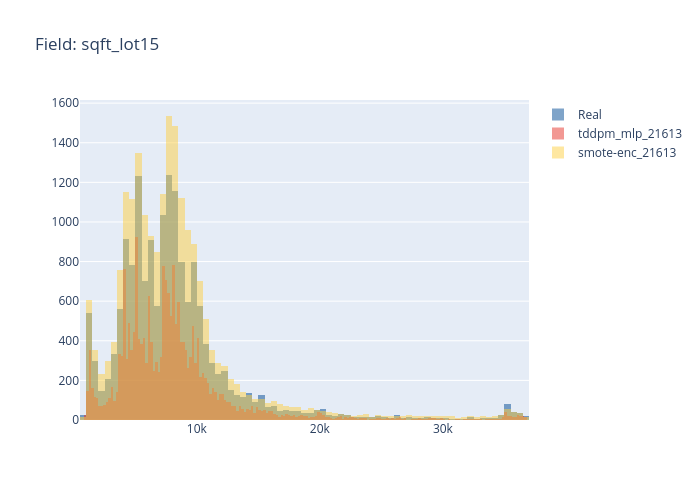

None

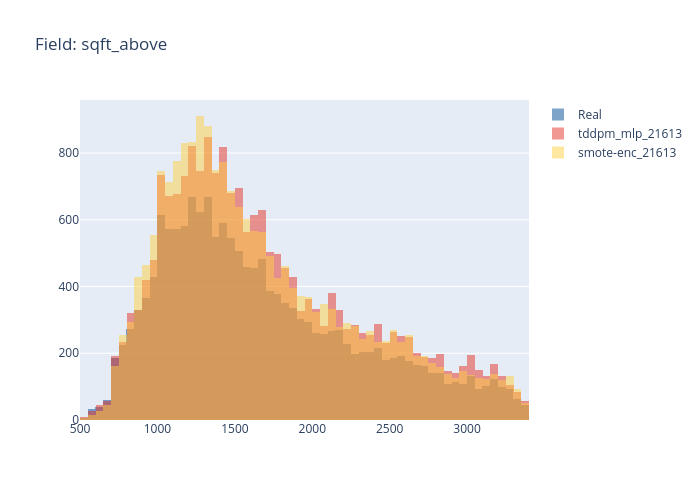

None

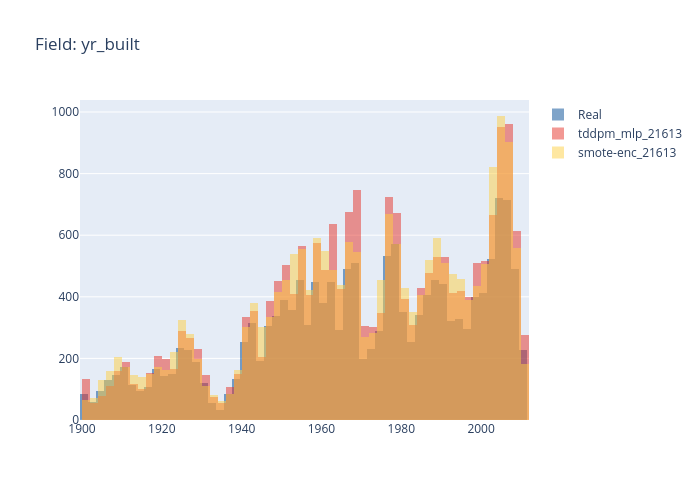

None

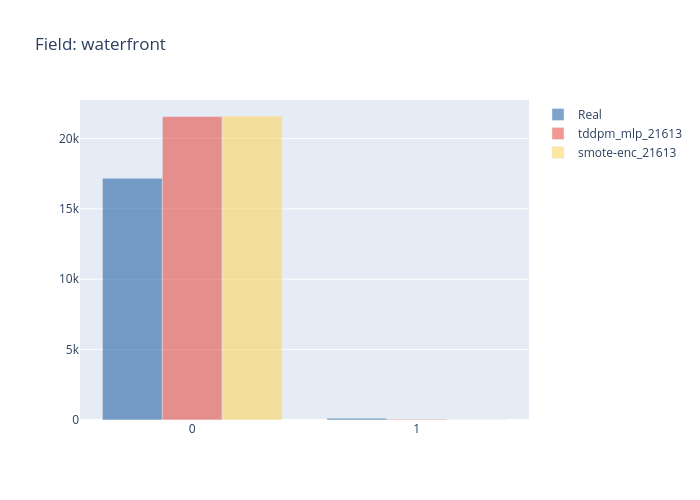

None

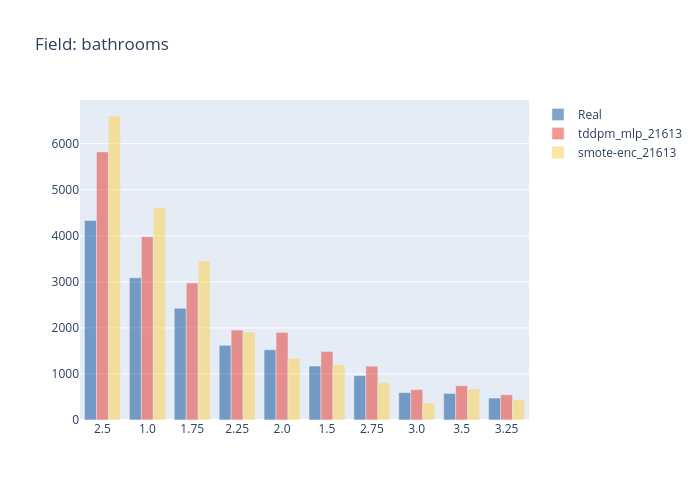

None

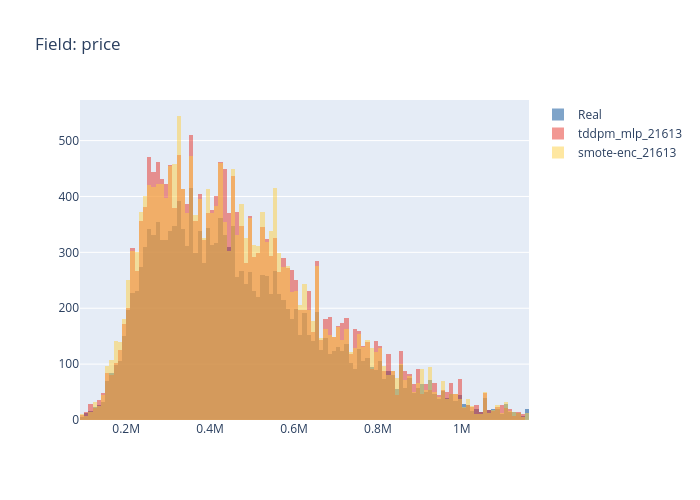

None

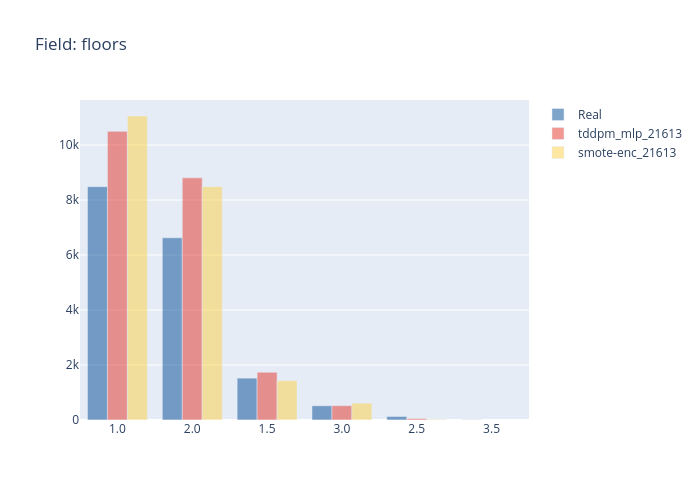

None

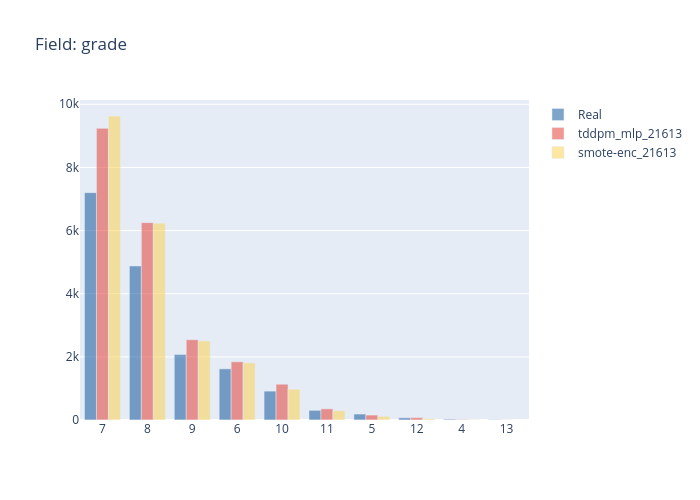

None

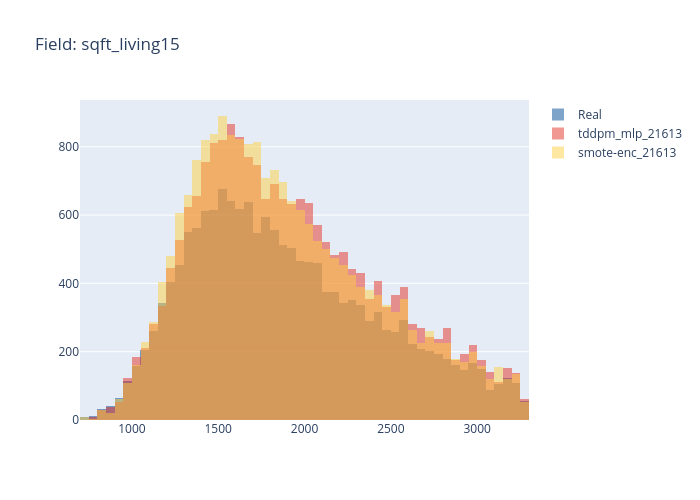

None

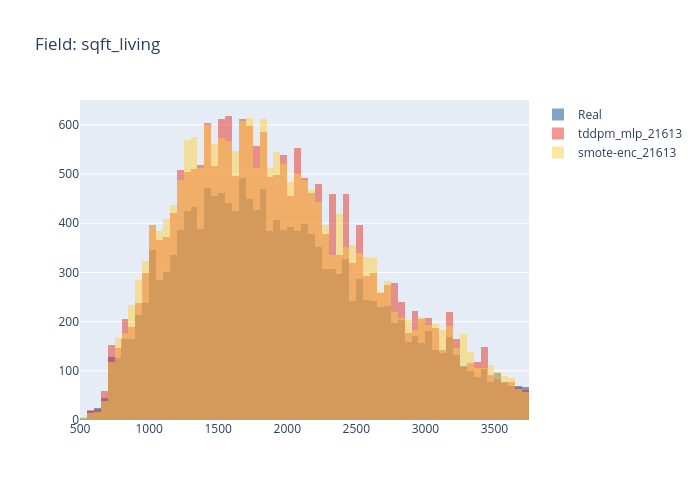

None

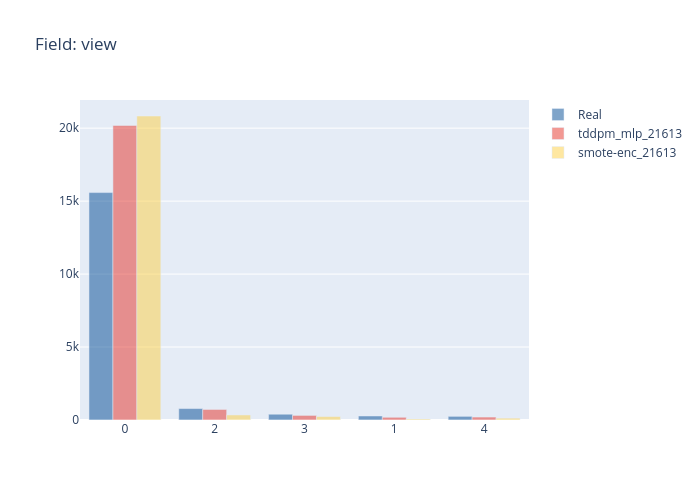

None

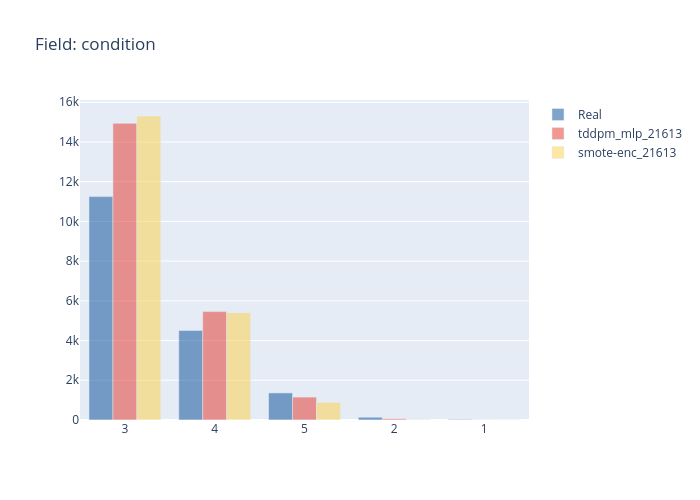

None

In [12]:
for fig in syn.get_multiple_charts([best_model,second_best_model], {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        display(fig.show("png"))


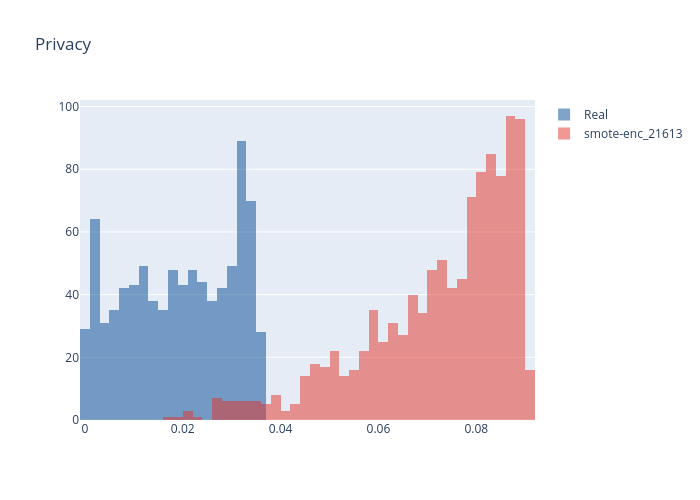

None

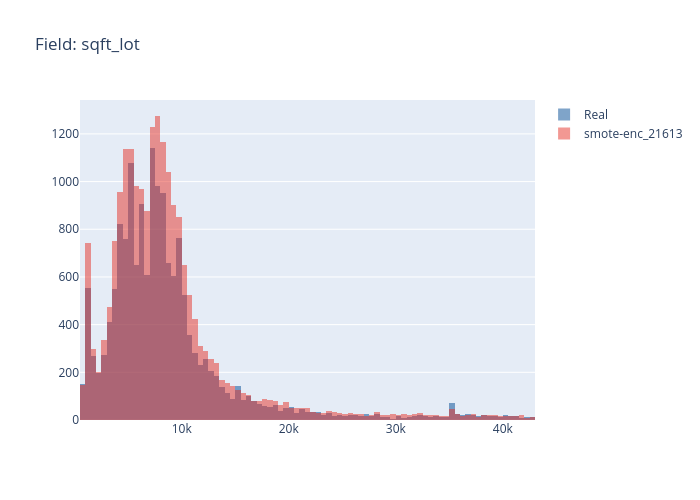

None

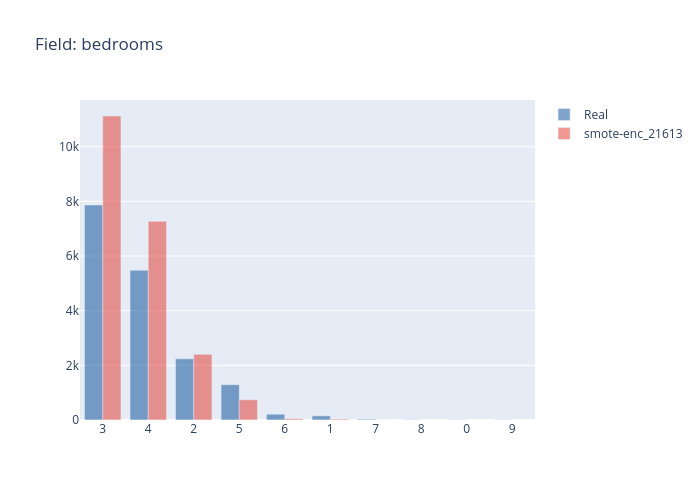

None

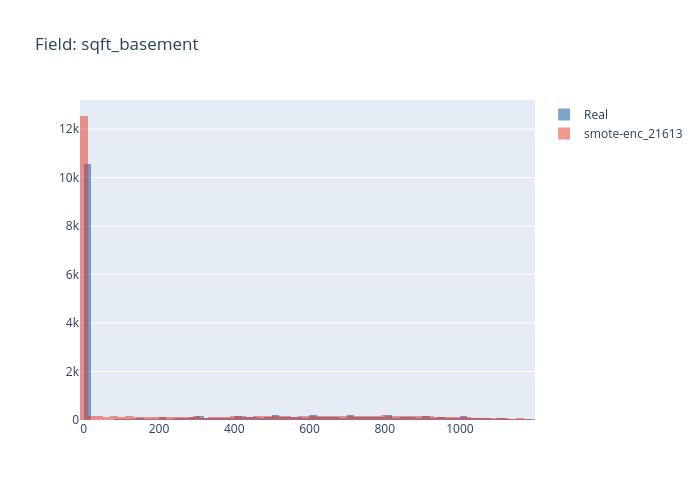

None

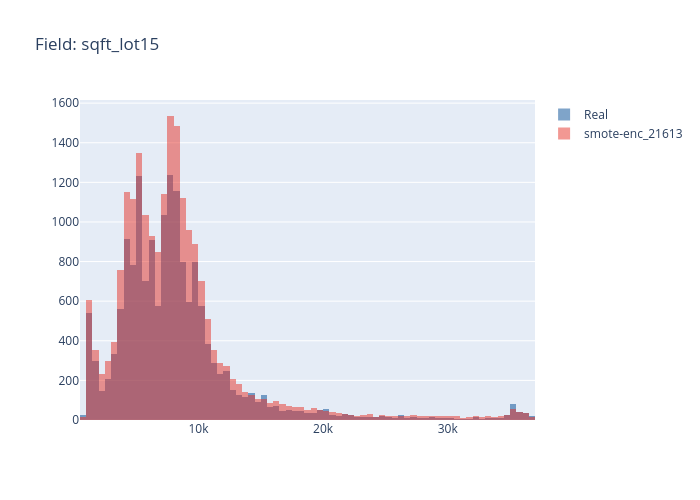

None

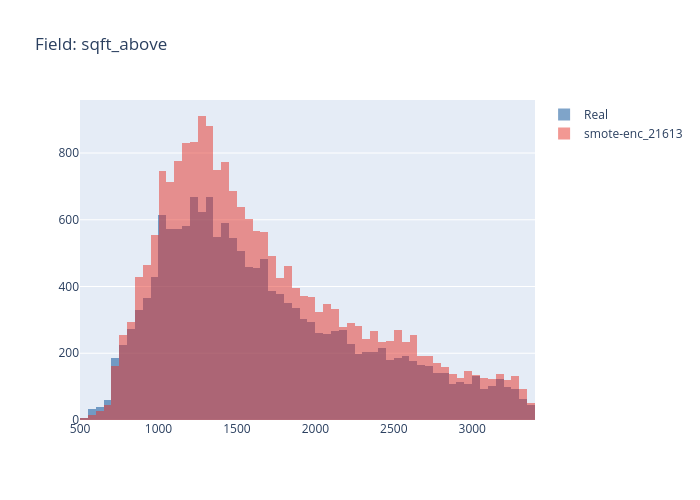

None

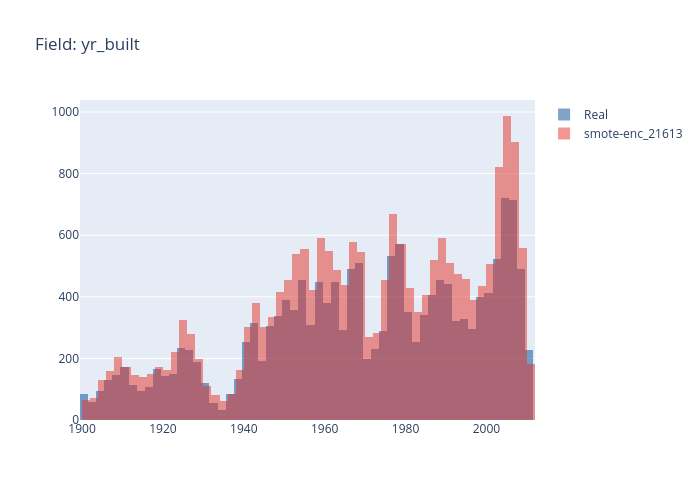

None

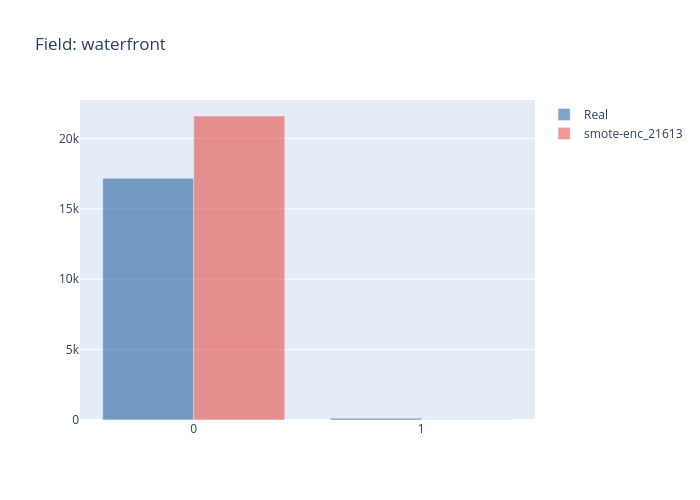

None

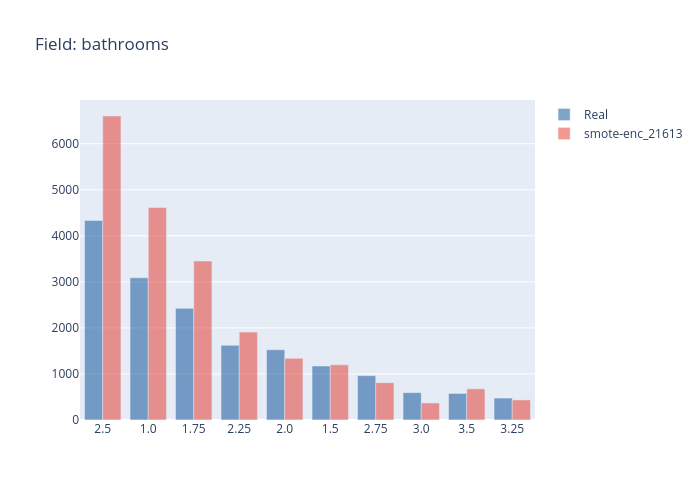

None

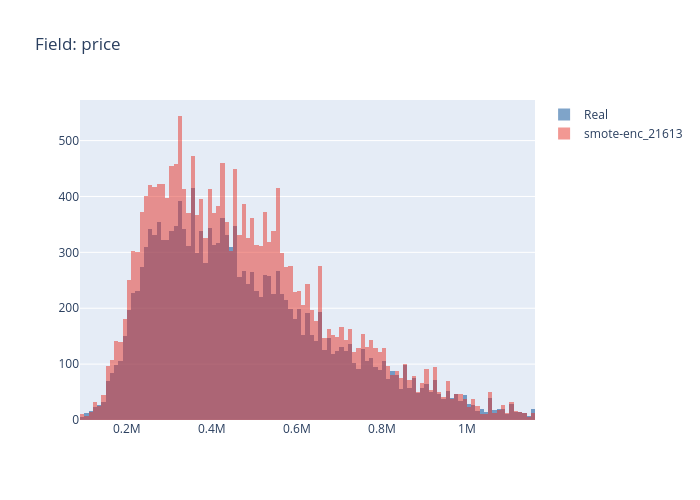

None

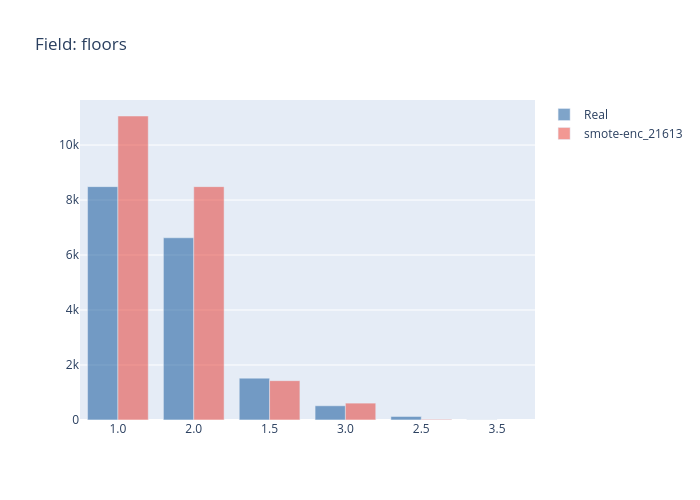

None

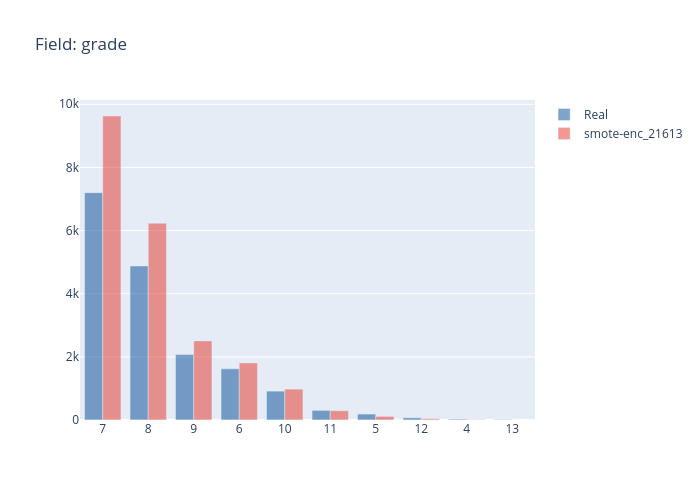

None

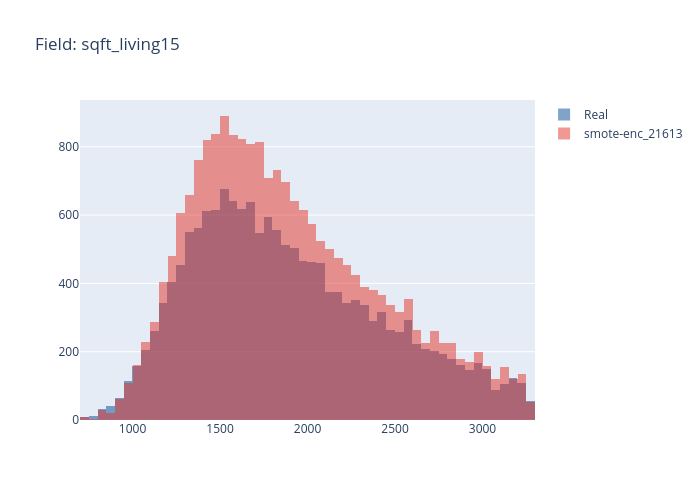

None

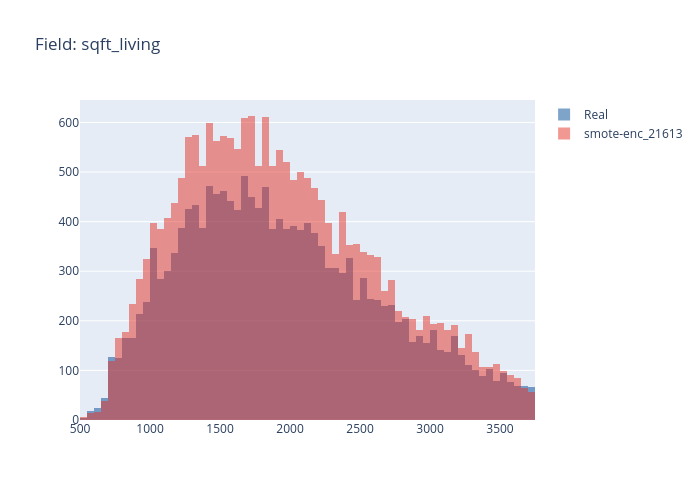

None

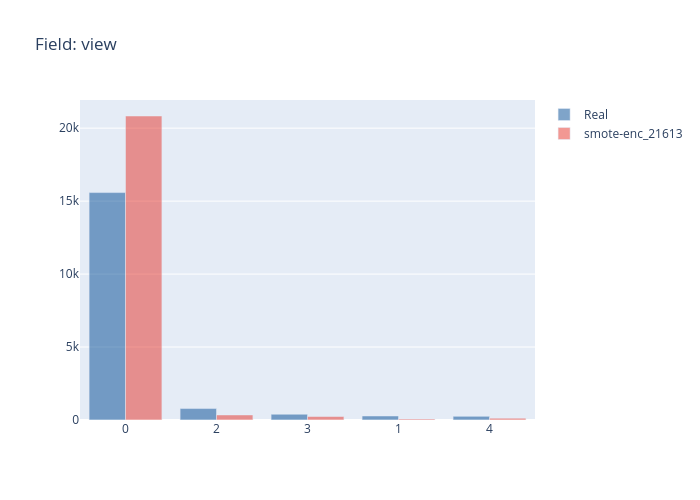

None

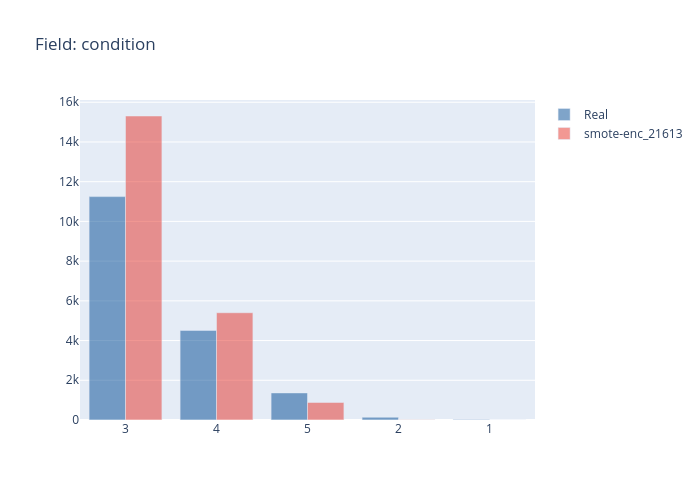

None

In [13]:
from syntheticml.data.charts import Charts
import os
folder_path = f"../docs/tesis/imagenes/{second_best_model}"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
for fig in syn.get_charts(second_best_model, {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        file_name = f'{fig.layout.title.text.replace(":","").replace(" ","_").lower()}.svg'
        fig.write_image(f"{folder_path}/{file_name}")
        display(fig.show("png"))

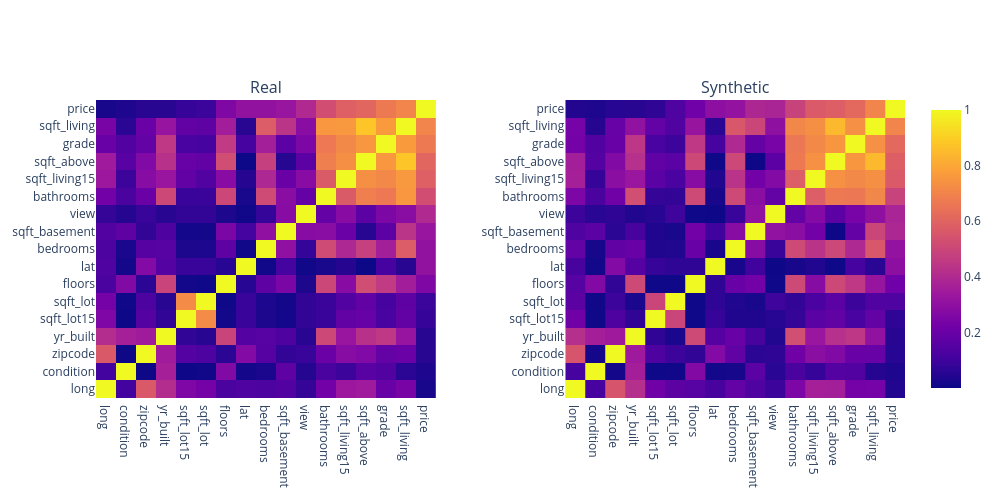

In [14]:
syn.charts.pair_corr(syn.df, syn.fake_data[best_model], {'id', 'waterfront', 'yr_renovated'}, "price").update_layout(dict(width=1000)).show("png")

In [15]:
for model in list(avg.sort_values("score", ascending=True).index):
    if model in set(["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"]):
        m = model.replace('_', '\_')
        print(f"""\\begin{{figure}}[H]
        \\centering
        \\includesvg[scale=.5,inkscapelatex=false]{{imagenes/kingcounty/{model}.svg}}
        \\caption{{Comparación de conjunto Real y Modelo: {m}}}
        \\label{{pair-{model}}}
    \end{{figure}}""")
        syn.charts.pair_corr(syn.df, syn.fake_data[model], {'id', 'waterfront', 'yr_renovated'}, "price").update_layout(dict(width=1000)).write_image(f"../docs/tesis/imagenes/kingcounty/{model}.svg")

\begin{figure}[H]
        \centering
        \includesvg[scale=.5,inkscapelatex=false]{imagenes/kingcounty/ctgan_21613.svg}
        \caption{Comparación de conjunto Real y Modelo: ctgan\_21613}
        \label{pair-ctgan_21613}
    \end{figure}
\begin{figure}[H]
        \centering
        \includesvg[scale=.5,inkscapelatex=false]{imagenes/kingcounty/ctgan_noise_21613.svg}
        \caption{Comparación de conjunto Real y Modelo: ctgan\_noise\_21613}
        \label{pair-ctgan_noise_21613}
    \end{figure}
\begin{figure}[H]
        \centering
        \includesvg[scale=.5,inkscapelatex=false]{imagenes/kingcounty/copulagan_21613.svg}
        \caption{Comparación de conjunto Real y Modelo: copulagan\_21613}
        \label{pair-copulagan_21613}
    \end{figure}
\begin{figure}[H]
        \centering
        \includesvg[scale=.5,inkscapelatex=false]{imagenes/kingcounty/copulagan_noise_21613.svg}
        \caption{Comparación de conjunto Real y Modelo: copulagan\_noise\_21613}
        \label{pair-co